# XGBoost

https://xgboost.readthedocs.io/en/stable/

In [1]:
# !pip install xgboost

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_ds = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_ds.data, iris_ds.target, random_state=0)

In [3]:
from xgboost import XGBClassifier
# 사이킷런이랑 비슷한 제공방식

xgb_clf = XGBClassifier(
    n_estimators = 100
    , max_depth = 3
    , learning_rate = 0.1
    , random_state = 0
)

xgb_clf.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'multi:softprob'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [5]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

1.0
0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [8]:
from sklearn.datasets import load_breast_cancer

bc_bs = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(bc_bs.data, bc_bs.target, random_state=0)

xgb_clf = XGBClassifier(random_state=0)
xgb_clf.fit(X_train, y_train)

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

1.0
0.986013986013986
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        53
           1       1.00      0.98      0.99        90

    accuracy                           0.99       143
   macro avg       0.98      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [10]:
xgb_clf = XGBClassifier(
    n_estimators = 500
    , learning_rate = 0.1
    , max_depth = 3
    , random_state = 0
    , early_stopping_rounds = 10    # 성능이 일정 횟수 이상 향상되지 않으면 조기종료
    , eval_metric = 'logloss'       # 검증 방식 (손실함수)
)

X_tr, X_eval, y_tr, y_eval = train_test_split(X_train, y_train, random_state=0)
eval_set = [(X_tr, y_tr), (X_eval, y_eval)]

xgb_clf.fit(X_tr, y_tr, eval_set=eval_set, verbose=True)
# eval_set : 검증데이터, verbose : 학습 중 검증 결과 출력 여부

[0]	validation_0-logloss:0.57452	validation_1-logloss:0.60880
[1]	validation_0-logloss:0.50928	validation_1-logloss:0.55472
[2]	validation_0-logloss:0.45694	validation_1-logloss:0.50527
[3]	validation_0-logloss:0.40953	validation_1-logloss:0.46292
[4]	validation_0-logloss:0.36927	validation_1-logloss:0.42700
[5]	validation_0-logloss:0.33481	validation_1-logloss:0.39919
[6]	validation_0-logloss:0.30438	validation_1-logloss:0.37171
[7]	validation_0-logloss:0.27723	validation_1-logloss:0.34853
[8]	validation_0-logloss:0.25387	validation_1-logloss:0.32843
[9]	validation_0-logloss:0.23308	validation_1-logloss:0.30965
[10]	validation_0-logloss:0.21360	validation_1-logloss:0.29418
[11]	validation_0-logloss:0.19725	validation_1-logloss:0.28057
[12]	validation_0-logloss:0.18229	validation_1-logloss:0.26975
[13]	validation_0-logloss:0.16936	validation_1-logloss:0.25935
[14]	validation_0-logloss:0.15736	validation_1-logloss:0.24851
[15]	validation_0-logloss:0.14565	validation_1-logloss:0.23954
[1

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",10
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes fr

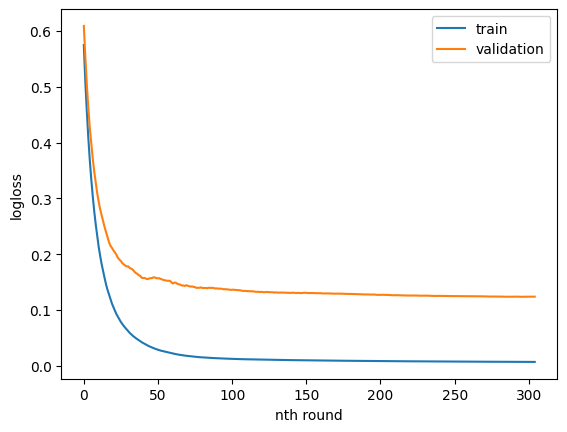

In [13]:
import matplotlib.pyplot as plt

result = xgb_clf.evals_result()

train_loss = result['validation_0']['logloss']
eval_loss = result['validation_1']['logloss']

plt.plot(train_loss, label='train')
plt.plot(eval_loss, label='validation')
plt.legend()
plt.xlabel('nth round')
plt.ylabel('logloss')
plt.show()

In [14]:
xgb_clf.score(X_train, y_train), xgb_clf.score(X_test, y_test)

(0.9929577464788732, 0.9790209790209791)

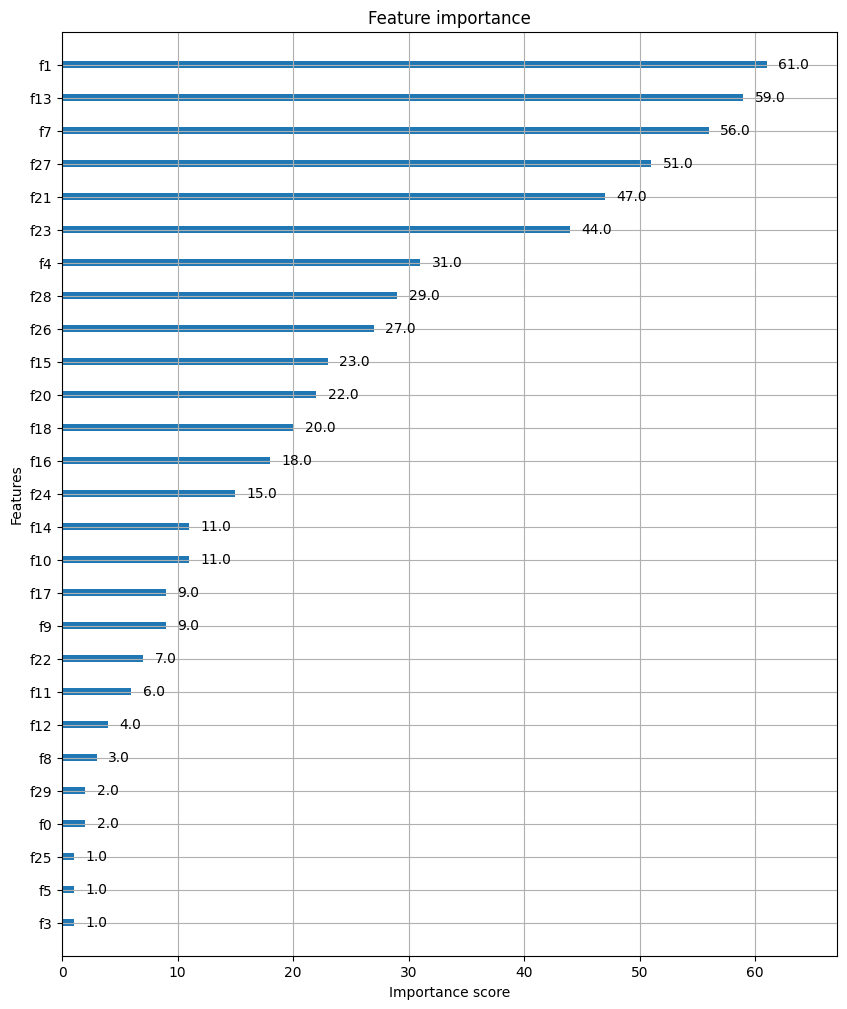

In [15]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_clf, ax=ax)
plt.show()

[0]	validation-logloss:0.44602
[1]	validation-logloss:0.32830
[2]	validation-logloss:0.24413
[3]	validation-logloss:0.18916
[4]	validation-logloss:0.14665
[5]	validation-logloss:0.11798
[6]	validation-logloss:0.09376
[7]	validation-logloss:0.07983
[8]	validation-logloss:0.06690
[9]	validation-logloss:0.05575
[10]	validation-logloss:0.04939
[11]	validation-logloss:0.04259
[12]	validation-logloss:0.03761
[13]	validation-logloss:0.03332
[14]	validation-logloss:0.02974
[15]	validation-logloss:0.02653
[16]	validation-logloss:0.02426
[17]	validation-logloss:0.02291
[18]	validation-logloss:0.02132
[19]	validation-logloss:0.01961
[20]	validation-logloss:0.01873
[21]	validation-logloss:0.01770
[22]	validation-logloss:0.01750
[23]	validation-logloss:0.01621
[24]	validation-logloss:0.01547
[25]	validation-logloss:0.01492
[26]	validation-logloss:0.01482
[27]	validation-logloss:0.01435
[28]	validation-logloss:0.01353
[29]	validation-logloss:0.01308
[30]	validation-logloss:0.01313
[31]	validation-lo

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

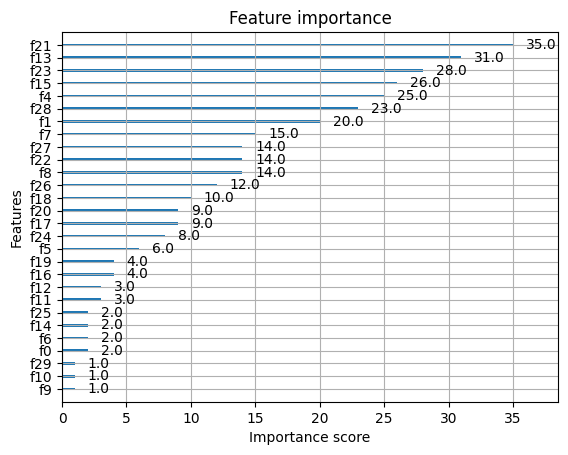

In [ ]:
import xgboost

# xgboost용 행렬
dtrain = xgboost.DMatrix(X_train, label=y_train)
deval = xgboost.DMatrix(X_eval, label=y_eval)

params = {
    'objective' : 'binary:logistic'
    , 'eval_metric' : 'logloss'
}

xgb_model = xgboost.train(params, dtrain, num_boost_round=500, evals=[(deval, 'validation')], early_stopping_rounds=10)

xgboost.plot_importance(xgb_model)